In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.stats import norm

In [ ]:
ids = pd.read_csv("/content/drive/MyDrive/ml-repo-master/ml-repo-master/IndustrialSafetyDS/industrial_safety.csv")

#Preprocessing

In [ ]:
ids.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,01-01-2016 00:00,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-2016 00:00,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-2016 00:00,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,08-01-2016 00:00,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,10-01-2016 00:00,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
ids.isnull().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [ ]:
ids.describe()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
count,424,424,424,424,424,424,424,424,424,424
unique,286,3,12,3,5,6,2,3,32,410
top,08-02-2017 00:00,United States,Kentucky,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
freq,6,251,90,241,315,143,403,189,232,3


In [ ]:
ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      424 non-null    object
 1   Countries                 424 non-null    object
 2   Local                     424 non-null    object
 3   Industry Sector           424 non-null    object
 4   Accident Level            424 non-null    object
 5   Potential Accident Level  424 non-null    object
 6   Gender                    424 non-null    object
 7   Employee or Third Party   424 non-null    object
 8   Critical Risk             424 non-null    object
 9   Description               424 non-null    object
dtypes: object(10)
memory usage: 33.2+ KB


In [ ]:
ids.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')

In [ ]:
ids.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,01-01-2016 00:00,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-2016 00:00,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-2016 00:00,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,08-01-2016 00:00,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,10-01-2016 00:00,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
ids.rename(columns={ 'Data':'Date','Countries':'Country'},inplace= True)
ids.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,01-01-2016 00:00,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-2016 00:00,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...


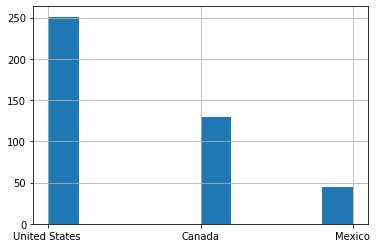

In [ ]:
ids['Country'].hist()

 Divide date coulmn in datetime

In [ ]:
ids['Date'] = pd.to_datetime(ids['Date'])
ids['Year'] = ids['Date'].apply(lambda x : x.year)
ids['Month'] = ids['Date'].apply(lambda x : x.month)
ids['Month Name'] = ids['Date'].apply(lambda x : x.month_name())
ids['Day'] = ids['Date'].apply(lambda x : x.day)
ids['Weekday'] = ids['Date'].apply(lambda x : x.day_name())
ids['weekofyear'] = ids['Date'].apply(lambda x : x.weekofyear)
ids.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Month Name,Day,Weekday,weekofyear
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,January,1,Friday,53
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,February,1,Monday,5


In [ ]:
def monthtoseason(x):
  if x in [9,10,11]:
    season = 'automn'
  elif x in [12,1,2]:
    season = 'winter'
  elif x in [3,4,5]:
    season = 'spring'
  elif x in [6,7,8]:
    season = 'summer'
  return season
ids['season'] = ids['Month'].apply(monthtoseason)
ids.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Month Name,Day,Weekday,weekofyear,season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,January,1,Friday,53,summer
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,February,1,Monday,5,summer


In [ ]:
ids['Country'].value_counts()

United States     251
Canada            129
Mexico             44
Name: Country, dtype: int64

In [ ]:
ids['Local'].value_counts()

Kentucky             90
British Columbia     58
West Virginia        57
Illinois             56
Pennsylvania         46
Mexico City          44
Ontario              26
Alberta              24
Manitoba             15
Yukon                 3
Quebec                3
Montana               2
Name: Local, dtype: int64

In [ ]:
ids['Industry Sector'].value_counts()

Mining    241
Metals    134
Others     49
Name: Industry Sector, dtype: int64

In [ ]:
ids['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
Pressurized Systems                            7
remains of choco                               7
Fall prevention                                6
Suspended Loads                                6
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Blocking and isolation of energies             3
Projection of fragments                        2
Machine Protection  

#Ghraph Based On Whole Data

In [ ]:
ccount = np.round(ids['Country'].value_counts(normalize = True)*100)
ccount

United States     59.0
Canada            30.0
Mexico            10.0
Name: Country, dtype: float64

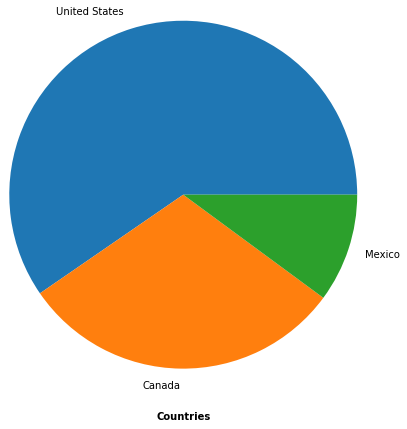

In [ ]:
plt.pie(ccount,labels=ccount.keys().values,radius= 2)
plt.xlabel('\n\n\n\n\n\n\n\n\nCountries',fontweight ='bold');

In [ ]:
lcount = ids['Local'].value_counts()
lcount

Kentucky             90
British Columbia     58
West Virginia        57
Illinois             56
Pennsylvania         46
Mexico City          44
Ontario              26
Alberta              24
Manitoba             15
Yukon                 3
Quebec                3
Montana               2
Name: Local, dtype: int64

Text(0.5, 0, '\n\n\n\n\n\n\n\nLocals')

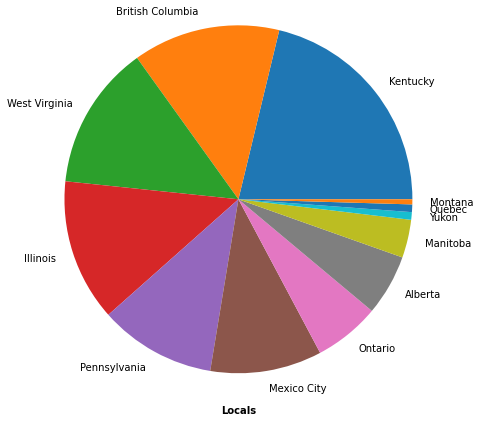

In [ ]:
plt.pie(lcount,labels=lcount.keys().values,radius = 2)
plt.xlabel('\n\n\n\n\n\n\n\nLocals',fontweight = 'bold')

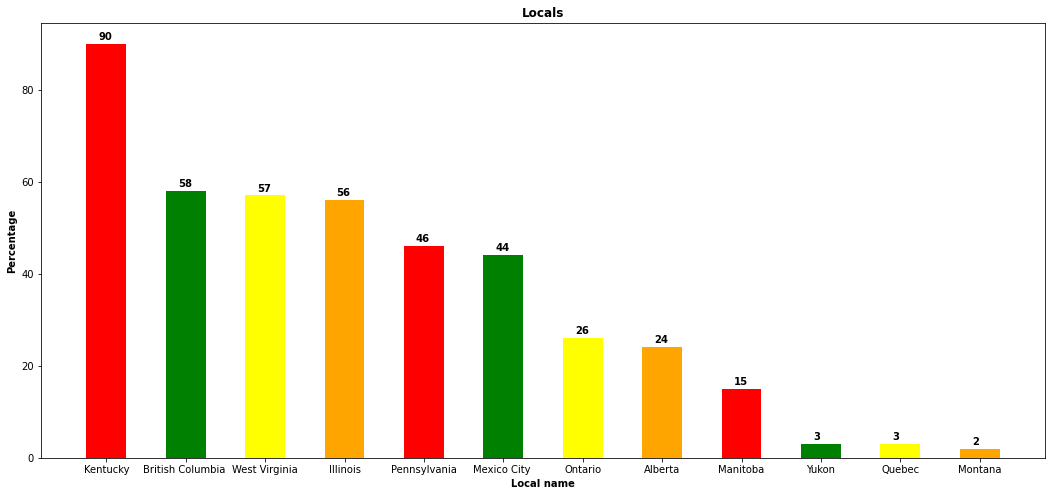

In [ ]:
fig, ax = plt.subplots(figsize = (18,8))
plt.bar(lcount.keys().values,lcount,width = 0.5,color = ['red','green','yellow','orange'])
plt.xlabel('Local name', fontweight = 'bold')
plt.ylabel('Percentage',fontweight = 'bold')
plt.title('Locals',fontweight = 'bold')

for i in ax.patches:
  plt.text(i.get_x()+0.15,i.get_height()+0.9,
          str(i.get_height()),fontweight ='bold',fontsize= 10,color ='black')

plt.show();

In [ ]:
iscount = np.round(ids['Industry Sector'].value_counts(normalize= True)*100)
iscount

Mining    57.0
Metals    32.0
Others    12.0
Name: Industry Sector, dtype: float64

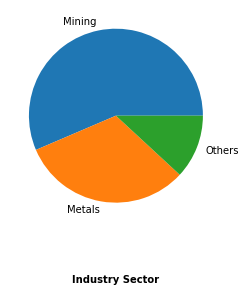

In [ ]:
plt.pie(iscount,labels = iscount.keys().values)
plt.xlabel('\n\n\n\nIndustry Sector',fontweight = 'bold',fontsize = 10);

In [ ]:
crcount = np.round(ids['Critical Risk'].value_counts(normalize = True)*100)
crcount

Others                                       55.0
Pressed                                       6.0
Manual Tools                                  5.0
Chemical substances                           4.0
Venomous Animals                              4.0
Cut                                           3.0
Projection                                    3.0
Bees                                          2.0
Fall                                          2.0
Vehicles and Mobile Equipment                 2.0
Fall prevention (same level)                  2.0
Pressurized Systems                           2.0
remains of choco                              2.0
Fall prevention                               1.0
Suspended Loads                               1.0
Pressurized Systems / Chemical Substances     1.0
Power lock                                    1.0
Liquid Metal                                  1.0
Blocking and isolation of energies            1.0
Projection of fragments                       0.0


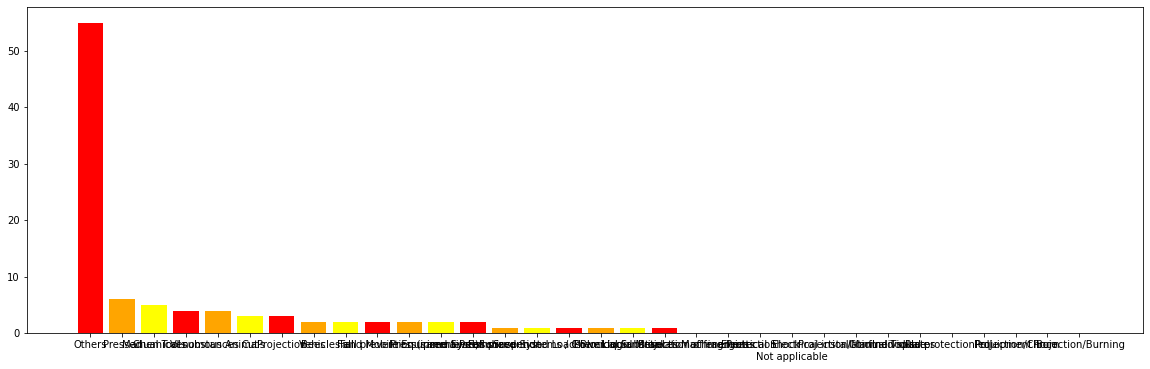

In [ ]:
plt.figure(figsize = (20,6))
plt.bar(crcount.keys().values,crcount,color = ['red','orange','yellow']);

In [ ]:
ids.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Month Name,Day,Weekday,weekofyear,season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,January,1,Friday,53,summer


In [ ]:
ecount = ids['Employee or Third Party'].value_counts()
ecount

Third Party             189
Employee                178
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64

Text(0.5, 0, 'Employee or Third Party')

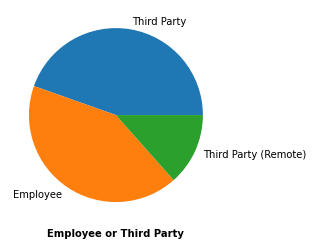

In [ ]:
plt.pie(ecount,labels = ecount.keys().values);
plt.xlabel('Employee or Third Party',fontweight = 'bold')

In [ ]:
ids.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Month Name,Day,Weekday,weekofyear,season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,January,1,Friday,53,summer
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,February,1,Monday,5,summer


In [ ]:
acount = np.append(np.round(ids['Accident Level'].value_counts(normalize = True)*100),0)
acount

array([74.,  9.,  7.,  7.,  2.,  0.])

In [ ]:
pacount = np.round(ids['Potential Accident Level'].value_counts(normalize = True)*100,decimals = 1)[[3,2,1,0,4,5]]
pacount

I      11.6
II     22.2
III    25.0
IV     33.7
V       7.3
VI      0.2
Name: Potential Accident Level, dtype: float64

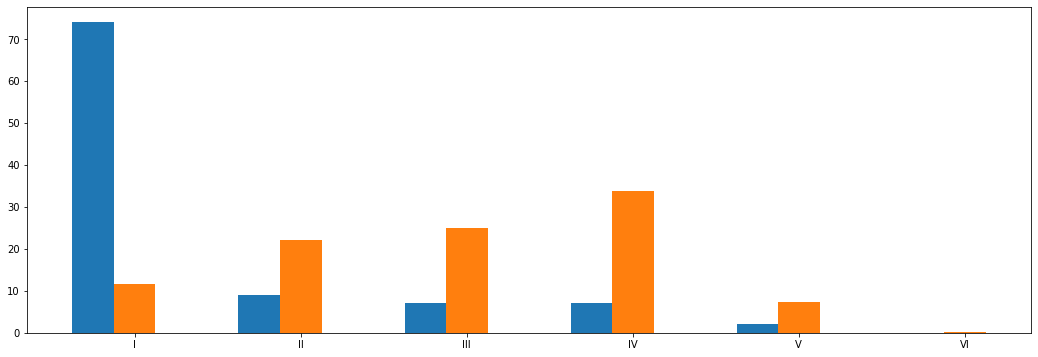

In [ ]:
plt.figure(figsize = (18,6))
bandwidth = 0.25
br1=np.arange(len(acount))
br2 = [x + bandwidth for x in br1]

plt.bar(br1,acount,width = 0.25)
plt.bar(br2,pacount,width = 0.25)
plt.xticks([r + bandwidth for r in range(len(br1))],pacount.keys().values);

# Result in United State only

In [ ]:

cntrs1 = ids[ids['Country'] == "United States "]
#lcount1 = np.round(cntrs1['Local'].value_counts(normalize= True)*100)
lcount1 = np.round(cntrs1['Local'].value_counts(normalize = True)*100)
lcount1

Kentucky         36.0
West Virginia    23.0
Illinois         22.0
Pennsylvania     18.0
Montana           1.0
Name: Local, dtype: float64

Text(0.5, 1.0, 'Accidents in locals of US')

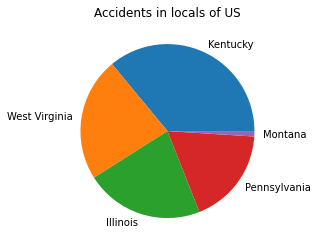

In [ ]:
plt.pie(lcount1,labels = lcount1.keys().values)
plt.title('Accidents in locals of US')

In [ ]:
ids.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Month Name,Day,Weekday,weekofyear,season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,January,1,Friday,53,summer


In [ ]:
iscount1 = np.round(cntrs1['Industry Sector'].value_counts(normalize = True)*100)
iscount1

Mining    81.0
Metals    18.0
Others     1.0
Name: Industry Sector, dtype: float64

<BarContainer object of 3 artists>

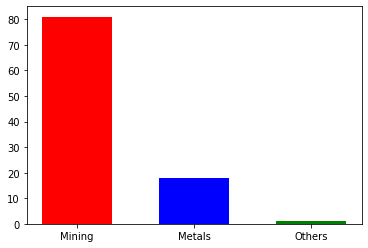

In [ ]:
plt.bar(iscount.keys().values,iscount1,width = 0.6,color = ['red','blue','green'])

In [ ]:
ecount1 = np.round(cntrs1['Employee or Third Party'].value_counts(normalize = True)*100)
ecount1

Third Party             55.0
Employee                35.0
Third Party (Remote)    10.0
Name: Employee or Third Party, dtype: float64

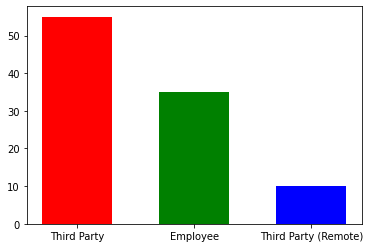

In [ ]:
plt.bar(ecount1.keys().values,ecount1,width = 0.6,color = ['red','green','blue']);

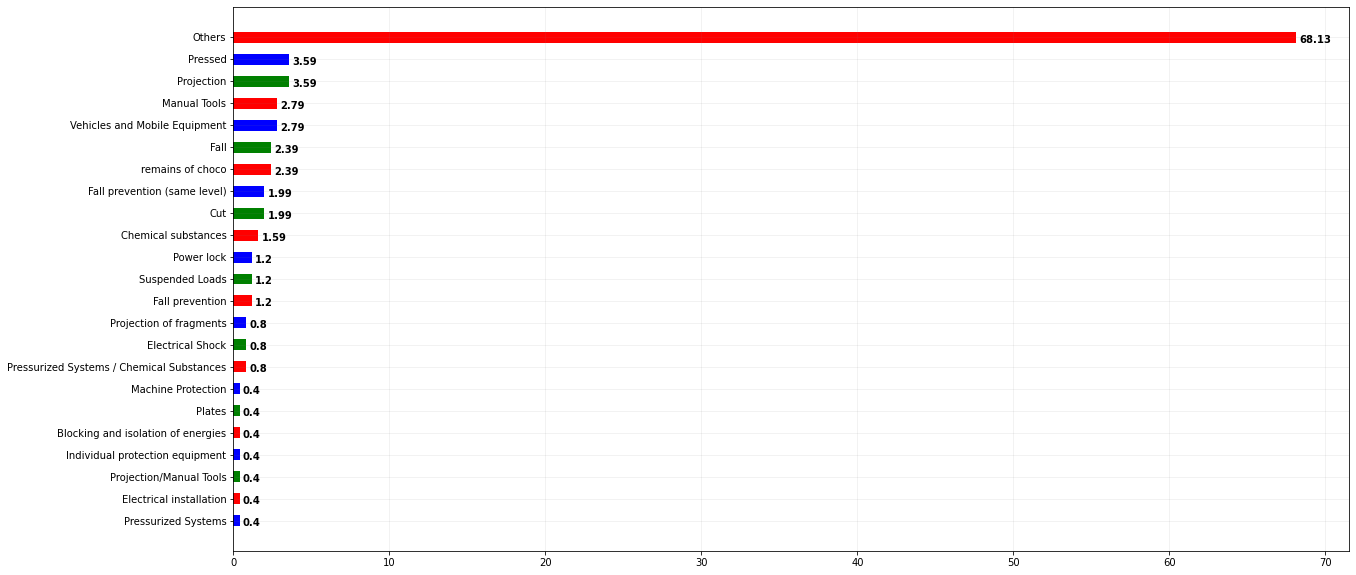

In [ ]:
crcount1 = np.round(cntrs1['Critical Risk'].value_counts(normalize =True)*100,2)
fig,ax = plt.subplots(figsize = (20,10))
plt.barh(crcount1.keys().values,crcount1,height = 0.5,color = ['red','blue','green'])
ax.invert_yaxis()

ax.grid(color = 'grey',alpha = 0.2,linewidth = 0.5)

for i in ax.patches:
  plt.text(i.get_width()+0.2,i.get_y()+0.5,str(round((i.get_width()),2)),fontsize = 10,fontweight = 'bold',color = 'black');

# Result In Canada Only

In [ ]:
ids.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Month Name,Day,Weekday,weekofyear,season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,January,1,Friday,53,summer
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,February,1,Monday,5,summer
2,2016-06-01,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,June,1,Wednesday,22,winter
3,2016-08-01,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,August,1,Monday,31,winter
4,2016-10-01,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,October,1,Saturday,39,spring


In [ ]:
cntrs2 = ids[ids['Country'] == "Canada"]
lcount2 = np.round(cntrs2['Local'].value_counts(normalize = True)*100)
lcount2

British Columbia     45.0
Ontario              20.0
Alberta              19.0
Manitoba             12.0
Quebec                2.0
Yukon                 2.0
Name: Local, dtype: float64

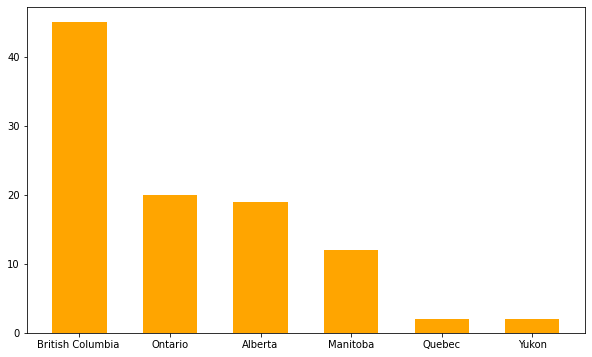

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(lcount2.keys().values,lcount2,width = 0.6,color = 'orange');

<BarContainer object of 3 artists>

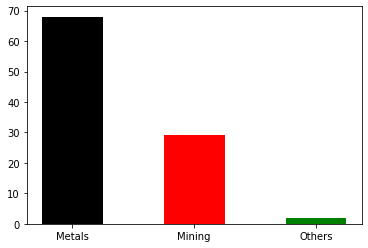

In [ ]:
iscount2 = np.round(cntrs2['Industry Sector'].value_counts(normalize = True)*100)
plt.bar(iscount2.keys().values,iscount2,width =0.5,color = ('black','red','green','grey'))

In [ ]:
ids.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Month Name,Day,Weekday,weekofyear,season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,January,1,Friday,53,summer
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,February,1,Monday,5,summer


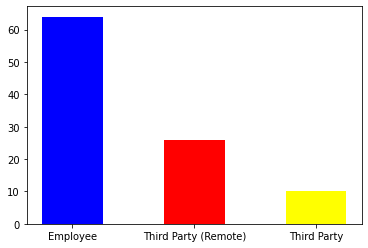

In [ ]:
ecount2 = np.round(cntrs2['Employee or Third Party'].value_counts(normalize = True)*100)
plt.bar(ecount2.keys().values,ecount2,width = 0.5,color = ('blue','red','yellow'));


#Resiult In Maxico Only

In [ ]:
ids.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Month Name,Day,Weekday,weekofyear,season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,January,1,Friday,53,summer


In [ ]:
cntrs3 = ids[ids['Country'] == "Mexico"]
cntrs3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 78 to 417
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      44 non-null     datetime64[ns]
 1   Country                   44 non-null     object        
 2   Local                     44 non-null     object        
 3   Industry Sector           44 non-null     object        
 4   Accident Level            44 non-null     object        
 5   Potential Accident Level  44 non-null     object        
 6   Gender                    44 non-null     object        
 7   Employee or Third Party   44 non-null     object        
 8   Critical Risk             44 non-null     object        
 9   Description               44 non-null     object        
 10  Year                      44 non-null     int64         
 11  Month                     44 non-null     int64         
 12  Month Name            

In [ ]:
lcount3 = np.round(cntrs3['Local'].value_counts(normalize = True)*100)
lcount3

Mexico City     100.0
Name: Local, dtype: float64

<BarContainer object of 1 artists>

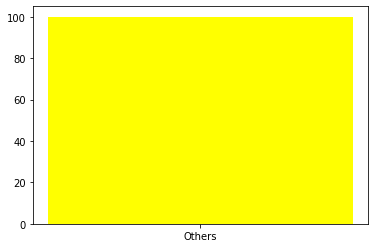

In [ ]:
iscount3 = np.round(cntrs3['Industry Sector'].value_counts(normalize = True)*100)
plt.bar(iscount3.keys().values,iscount3,width = 0.5,color = ('yellow','red','green'))

In [ ]:
ids['Country'].value_counts()

United States     251
Canada            129
Mexico             44
Name: Country, dtype: int64

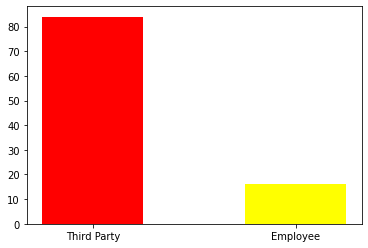

In [ ]:
ecount3 = np.round(cntrs3['Employee or Third Party'].value_counts(normalize = True)*100)
plt.bar(ecount3.keys().values,ecount3,width = 0.5,color = ['red','yellow']);

#Result by output of all data

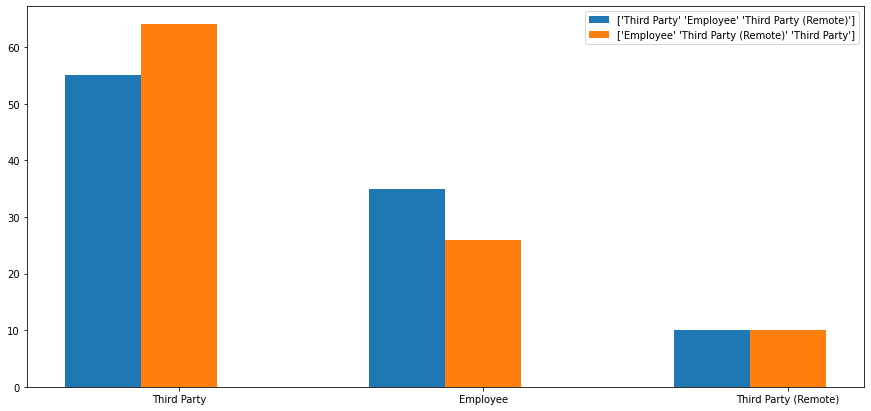

In [ ]:
plt.figure(figsize = (15,7))
brwdh = 0.25

b1 = ecount1.to_numpy()
b2 = ecount2.to_numpy()
b3 = ecount3.to_numpy()

r1 = np.arange(len(b1))
r2 =  [x + brwdh for x in r1]
#r3 = [ x + brwdh for x in r2]

plt.bar(r1,ecount1,width = brwdh,label = ecount1.keys().values)
plt.bar(r2,ecount2,width = brwdh,label = ecount2.keys().values)
#plt.bar(r3,ecount3,width = brwdh,label = ecount2.keys().values)

plt.xticks([r + brwdh for r in range(len(b1))],ecount1.keys().values)
plt.legend()
plt.show();


In [ ]:
prcnt = lambda x : np.round(x/x.sum()*100,1)
Emp_Cunt = ids.groupby(['Employee or Third Party','Country'])['Employee or Third Party'].count().unstack().apply(prcnt,axis = 0)
Emp_Cunt

Country,Canada,Mexico,United States
Employee or Third Party,,,
Employee,64.3,15.9,35.1
Third Party,10.1,84.1,55.4
Third Party (Remote),25.6,NaN,9.6


In [ ]:
Emp_Cunt['Canada'].keys().values

array(['Employee', 'Third Party', 'Third Party (Remote)'], dtype=object)

In [ ]:
prcnt = lambda  x : np.round(x/(x.sum())*100,1)
mnt_cnt = ids.groupby(['Month','Accident Level'])['Month'].count().unstack().apply(prcnt,axis = 1).fillna(0)
mnt_cnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       12 non-null     float64
 1   II      12 non-null     float64
 2   III     12 non-null     float64
 3   IV      12 non-null     float64
 4   V       12 non-null     float64
dtypes: float64(5)
memory usage: 576.0 bytes


In [ ]:
mnt_cnt.reset_index(level= 0,inplace = True)
mnt_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   12 non-null     int64  
 1   I       12 non-null     float64
 2   II      12 non-null     float64
 3   III     12 non-null     float64
 4   IV      12 non-null     float64
 5   V       12 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 704.0 bytes


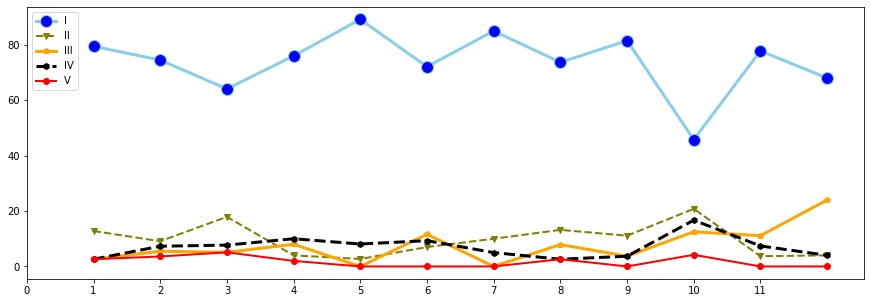

In [ ]:
plt.figure(figsize=(15,5))
plt.plot('Month', 'I' , data=mnt_cnt, marker='o', markerfacecolor = 'blue' , markersize = 12,color = 'skyblue', linewidth = 3)
plt.plot('Month','II',data=mnt_cnt,marker='v',color = 'olive',linewidth = 2,linestyle = 'dashed')
plt.plot('Month','III',data=mnt_cnt,marker='p',color = 'orange',linewidth = 3)
plt.plot('Month','IV',data=mnt_cnt,marker='h',color = 'black',linewidth = 3,linestyle = 'dashed')
plt.plot('Month','V',data=mnt_cnt,marker='o',color = 'red',linewidth = 2)
plt.xticks(mnt_cnt['II'].keys().values)
plt.legend();

In [ ]:
mnt_cnt1 = np.round(ids['Month'].value_counts(normalize = True)*100,1)
mnt_cnt1

2     13.0
4     11.8
6     10.1
3      9.2
1      9.2
8      9.0
5      8.7
11     6.4
9      6.4
12     5.9
10     5.7
7      4.7
Name: Month, dtype: float64

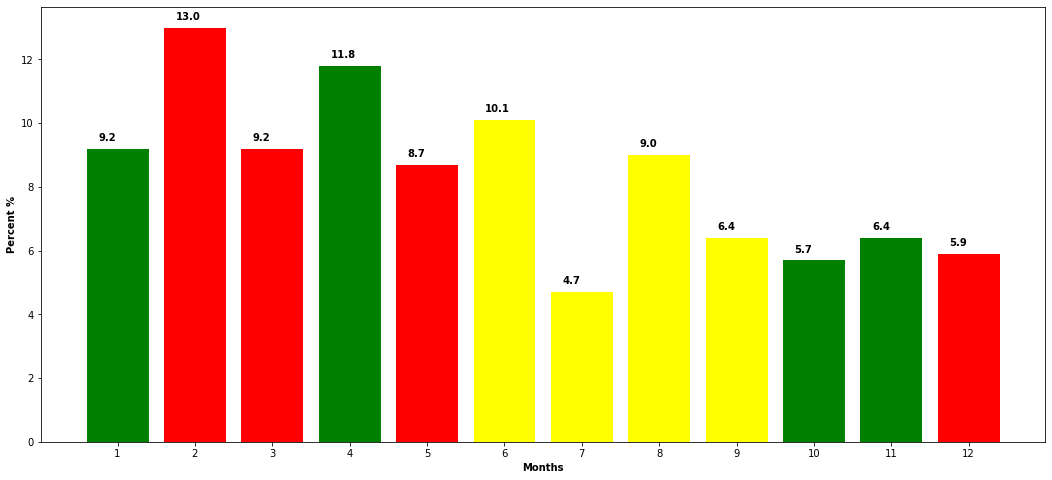

In [ ]:
fig,ax = plt.subplots(figsize = (18,8))
plt.bar(mnt_cnt1.keys().values,mnt_cnt1,color = ('red','green','yellow'))
plt.xlabel('Months',fontweight = 'bold')
plt.ylabel('Percent %',fontweight = 'bold')
for i in ax.patches:
  plt.text(i.get_x()+0.15,i.get_height()+0.25,str(i.get_height()),color = 'black',fontweight = 'bold')
  plt.xticks(mnt_cnt1.keys().values);

In [ ]:
year_count = ids['Year'].value_counts()
day_count = ids['Day'].value_counts()
wekdy_count = ids['Weekday'].value_counts()[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
#wekdy_count = ids['Weekday'].value_counts()[['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday']]
wekyr_count = ids['weekofyear'].value_counts()
season_count = np.round(ids['season'].value_counts(normalize = True)*100)

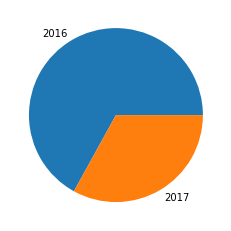

In [ ]:
#plt.pie(year_count,labels= year_count_keys().values);
plt.pie(year_count,labels= year_count.keys().values);

In [ ]:
def lst(a):
  lst1 = []
  for i in range(1,a+1):
    lst1.append(i)
  return(lst1)

In [ ]:
day1 = day_count[lst(len(day_count.keys().values))]
day1

1     17
2     21
3     24
4     24
5     18
6     21
7     14
8      8
9      9
10    10
11     4
12    10
13    15
14    12
15    15
16    19
17    15
18    15
19    11
20    11
21     9
22    17
23    17
24    16
25    15
26     9
27     9
28     6
29    12
30    14
31     7
Name: Day, dtype: int64

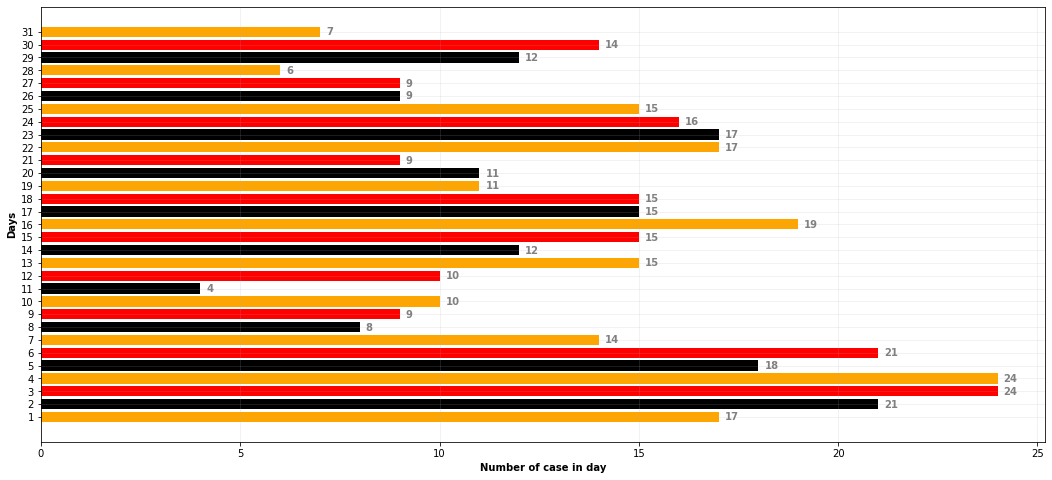

In [ ]:
fig,ax = plt.subplots(figsize = (18,8))
plt.barh(day1.keys().values,day1.values,color = ('orange','black','red'))
plt.xlabel('Number of case in day',fontweight = 'bold')
plt.ylabel('Days',fontweight = 'bold')
plt.yticks(day1.keys().values)
for x in ax.patches:
  plt.text(x.get_width()+0.15,x.get_y()+0.15,str(x.get_width()),color = 'grey',fontweight = 'bold')
ax.grid(alpha = 0.2)

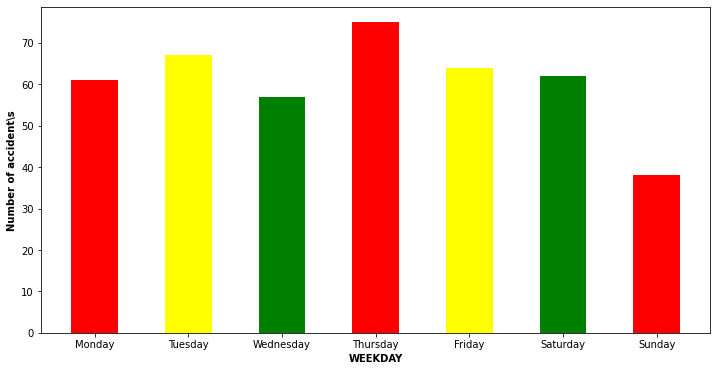

In [ ]:
plt.figure(figsize = (12,6))
plt.bar(wekdy_count.keys().values,wekdy_count.values,color = ('red','yellow','green'),width = 0.5)
#plt.bar(wekdy_count.keys().values,wekday_count.values,color = ('red','yellow','green'),width = 0.5)
plt.xlabel('WEEKDAY',fontweight = 'bold')
plt.ylabel('Number of accident\s',fontweight = 'bold');

In [ ]:
wekyr1 = wekyr_count[lst(len(wekyr_count.keys().values))]
wekyr1

1     11
2      6
3      8
4     10
5     14
6      5
7     21
8     14
9      8
10     7
11    13
12     8
13    10
14    17
15     8
16     8
17    13
18    13
19     2
20    12
21     9
22     8
23     6
24    14
25    14
26     6
27     7
28     3
29     3
30     3
31    20
32     7
33     3
34     5
35    10
36     4
37     6
38     7
39     6
40     7
41     5
42     4
43     5
44     9
45    10
46     1
47     4
48     6
49     5
50     8
51     5
52     4
53     2
Name: weekofyear, dtype: int64

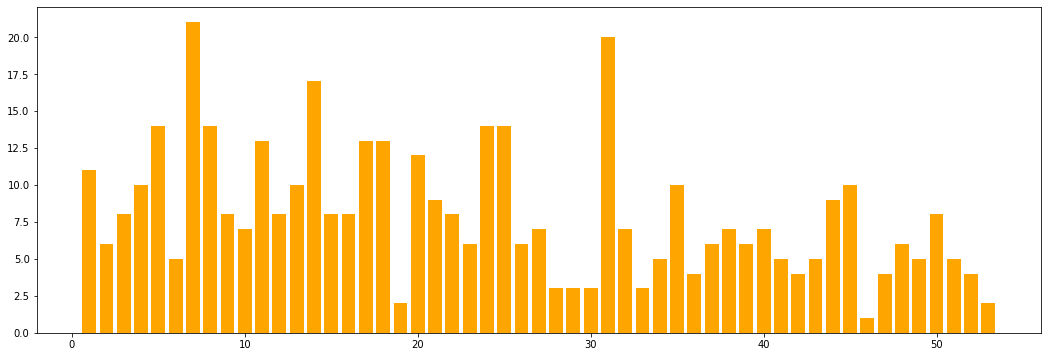

In [ ]:
plt.figure(figsize = (18,6))
plt.bar(wekyr1.keys().values,wekyr1,color = 'orange');

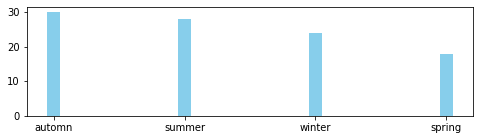

In [ ]:
plt.figure(figsize = (8,2))
plt.bar(season_count.keys().values,season_count,color = 'skyblue',width = 0.1);

**Now some graph depend on the data of US**

In [ ]:
cntrs1.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Month Name,Day,Weekday,weekofyear,season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,January,1,Friday,53,summer


In [ ]:
mnt_cnt_us = np.round(cntrs1['Month'].value_counts(normalize = True)*100)
year_count_us = cntrs1['Year'].value_counts()
day_count_us = cntrs1['Day'].value_counts()
wekdy_count_us = cntrs1['Weekday'].value_counts()[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
wekyr_count_us = cntrs1['weekofyear'].value_counts()
season_count_us = np.round(cntrs1['season'].value_counts(normalize = True)*100)

In [ ]:
mnt_cnt_us1 = mnt_cnt_us[lst(len(mnt_cnt_us.values))]
mnt_cnt_us1

1     10.0
2     12.0
3     10.0
4     10.0
5      7.0
6      9.0
7      6.0
8     10.0
9      7.0
10     6.0
11     8.0
12     6.0
Name: Month, dtype: float64

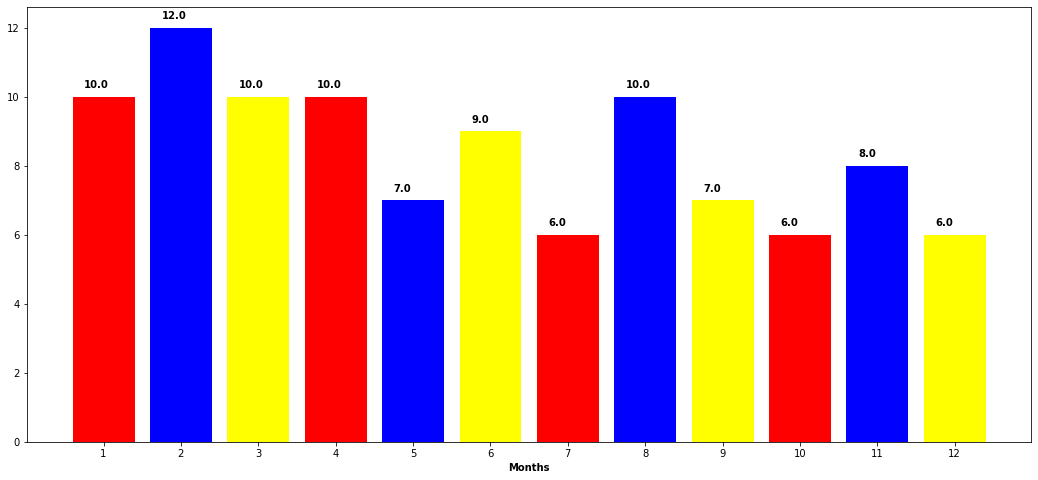

In [ ]:
fig,ax = plt.subplots(figsize = (18,8))
plt.bar(mnt_cnt_us1.keys().values,mnt_cnt_us1,color = ('red','blue','yellow'))
plt.xlabel('Months',fontweight = 'bold')
for i in ax.patches:
  plt.text(i.get_x()+0.15,i.get_height()+0.25,str(i.get_height()),color = 'black',fontweight = 'bold')
plt.xticks(mnt_cnt_us1.keys().values);

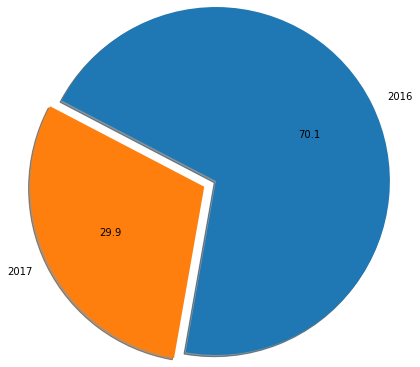

In [ ]:
plt.pie(year_count_us,labels= year_count_us.keys().values,autopct='%.1f',radius=2,shadow = True,explode = (0,0.15),startangle = 260);


In [ ]:
wekdy_count_us

Monday       33
Tuesday      36
Wednesday    33
Thursday     39
Friday       43
Saturday     41
Sunday       26
Name: Weekday, dtype: int64

In [ ]:
type(wekdy_count_us)

pandas.core.series.Series

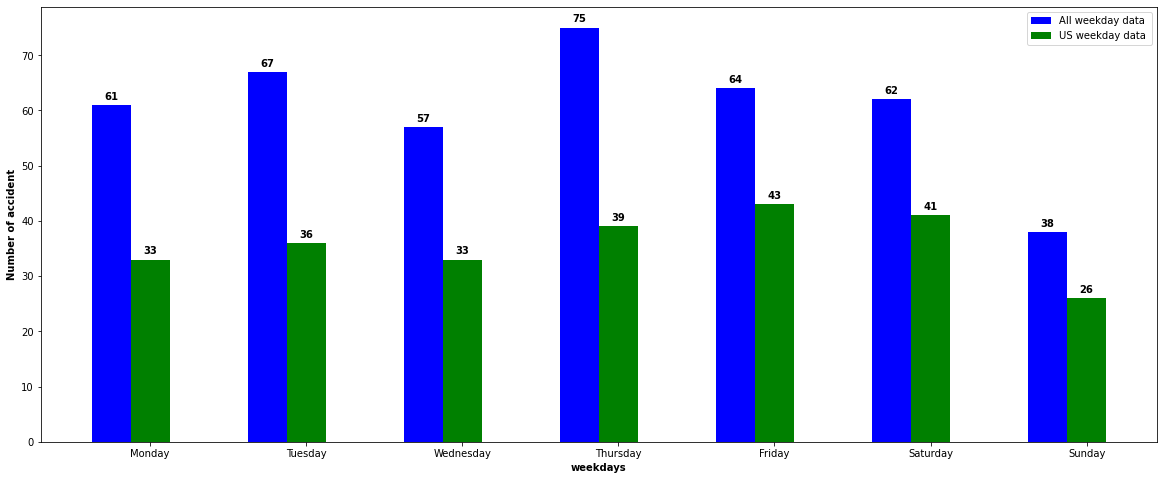

In [ ]:
# Total weekdays vs US weekdays difference
fig,ax = plt.subplots(figsize = (20,8))
barwidth = 0.25
bar1 = wekdy_count.to_numpy()
bar2 = wekdy_count_us.to_numpy()

r1 = np.arange(len(bar1))
r2 = [x + barwidth for x in r1]

plt.bar(r1,wekdy_count,width=barwidth,color = 'blue',label = 'All weekday data ')
plt.bar(r2,wekdy_count_us,width = barwidth,color = 'green',label = 'US weekday data')

plt.xlabel('weekdays',fontweight = 'bold')
plt.ylabel('Number of accident',fontweight = 'bold')
for i in ax.patches:
  plt.text(i.get_x()+0.08,i.get_height()+1,str(i.get_height()),color = 'black',fontweight = 'bold')

plt.xticks([r+bandwidth for r in range(len(bar1))],wekdy_count_us.keys().values)
plt.legend();

#*WORD COLUD*

In [ ]:
from wordcloud import WordCloud,STOPWORDS


In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['employee','operator','work','assistance','moment','accident','support','team'])



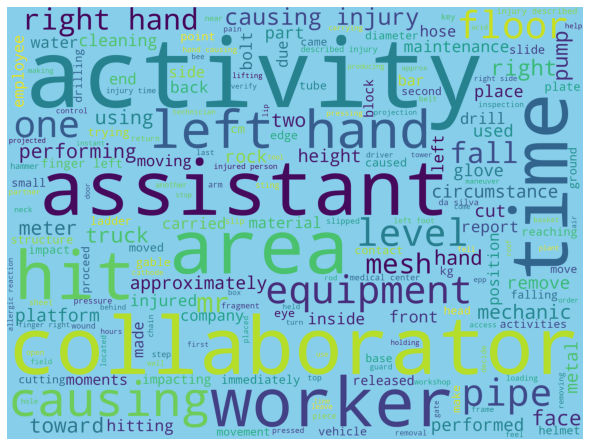

In [ ]:
for val in ids.Description:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()


  comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 2400, height = 1800,background_color = 'skyblue',stopwords = stopwords,min_font_size = 10).generate(comment_words)



plt.figure(figsize = (18,6),facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)